<a href="https://colab.research.google.com/github/Esmaysl/Dogal_D_Is/blob/main/Dogal_Dil_Odev3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Gerekli kütüphaneleri yükleyelim
!pip install textblob
import pandas as pd
from textblob import TextBlob
!pip install nltk
!pip install matplotlib seaborn
!pip install pandas matplotlib nltk





In [9]:
# Yorumlar.csv dosyasını okuma
file_path = '/content/yorumlar.csv'  # Dosya yolunu belirtiyoruz
df = pd.read_csv(file_path)

# Yorumların olduğu sütunu kontrol edelim
df.head()  # İlk 5 satırı görelim


,Yorum
0,çok güzel çok rahat bir ayakkabı kısa sürede e...
1,"Çok güzel bir ayakkabı, tam numaranızı alabili..."
2,Harika bayıldım. tam numaranızı almanızı öneri...
3,Çok rahat ve çok sıcak tutuyor tam numara alab...
4,İndirimdeki inanmıştım fiyatına göre gayet güz...


In [10]:
# Yorumları olumlu/olumsuz olarak sınıflandırma fonksiyonu
#def analyze_sentiment(comment):
    #analysis = TextBlob(comment)
    # Polarity değeri -1 ile 1 arasında değişir. Negatifse olumsuz, pozitifse olumlu olarak sınıflandırılır.
    #if analysis.sentiment.polarity > 0:
     #   return 'Olumlu'
   # elif analysis.sentiment.polarity == 0:
      # return 'Nötr'
   # else:
      #  return 'Olumsuz'

      # Duygu analizi için daha hassas bir fonksiyon
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    # Polarite eşiğini güncelliyoruz
    if analysis.sentiment.polarity > 0.1:
        return 'Olumlu'
    elif analysis.sentiment.polarity < -0.1:
        return 'Olumsuz'
    else:
        return 'Nötr'



In [11]:
# 'Yorum' sütununu kullanarak duygu analizi yapalım
df['Duygu'] = df['Yorum'].apply(analyze_sentiment)

# Sonuçları görelim
print(df[['Yorum', 'Duygu']])


                                                Yorum   Duygu
0   çok güzel çok rahat bir ayakkabı kısa sürede e...    Nötr
1   Çok güzel bir ayakkabı, tam numaranızı alabili...    Nötr
2   Harika bayıldım. tam numaranızı almanızı öneri...    Nötr
3   Çok rahat ve çok sıcak tutuyor tam numara alab...    Nötr
4   İndirimdeki inanmıştım fiyatına göre gayet güz...    Nötr
5   cok kullanışlı ve kaliteli, kesinlikle tavsiye...    Nötr
6             Sıcacık ,kendi numaranızı alabilirsiniz    Nötr
7   kendi numaramı aldım tam oldu. bayıldım tam bi...    Nötr
8   Ben normalde 37 giyiyorum fakat bir numara büy...    Nötr
9   Aşırı güzel bir ürün kaliteli sıcacık tutuyor ...    Nötr
10  Hızlı kargolama, çok beğendim. Harika duruyor ...    Nötr
11                    Yumuşacık ve sıcacık tutuyorlar    Nötr
12  Kendi numaramı aldım ve tam oldu kargosu da hı...    Nötr
13      Tam bedenimi aldım gayet güzel kalıtelı geldı    Nötr
14  kesinlikle kendi numaranızı alın 37.5 giyiyors...    Nötr
15  Ürün

In [12]:
# Sonuçları yeni bir CSV dosyasına kaydedelim
df.to_csv('/content/yorumlar_sonuc.csv', index=False)

print("Yorumlar sınıflandırıldı ve /content/yorumlar_sonuc.csv dosyasına kaydedildi.")


Yorumlar sınıflandırıldı ve /content/yorumlar_sonuc.csv dosyasına kaydedildi.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-19-f8bfa233957d>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duygu_dagilimi.index, y=duygu_dagilimi.values, palette='viridis')


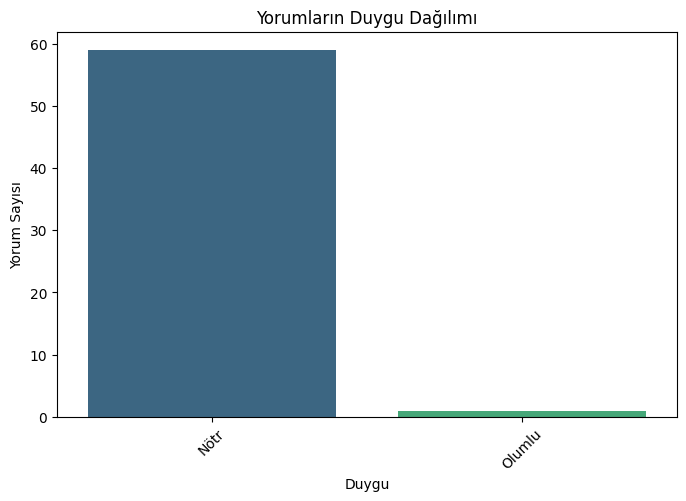

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# NLTK'nın VADER duygu analizörü için gerekli verileri indirin
nltk.download('vader_lexicon')

# Yorumları CSV dosyasından oku
csv_file_path = r"/content/yorumlar_sonuc.csv"
yorumlar_df = pd.read_csv(csv_file_path)

# Duygu analizörü
sia = SentimentIntensityAnalyzer()

# Analiz fonksiyonu
def analiz_yap(yorum):
    score = sia.polarity_scores(yorum)
    if score['compound'] >= 0.05:
        return 'Olumlu'
    elif score['compound'] <= -0.05:
        return 'Olumsuz'
    else:
        return 'Nötr'

# Her yorumu analiz et
yorumlar_df['Duygu'] = yorumlar_df['Yorum'].apply(analiz_yap)

# Duygu dağılımını sayma
duygu_dagilimi = yorumlar_df['Duygu'].value_counts()

# Grafik oluşturma
plt.figure(figsize=(8, 5))
sns.barplot(x=duygu_dagilimi.index, y=duygu_dagilimi.values, palette='viridis')
plt.title('Yorumların Duygu Dağılımı')
plt.xlabel('Duygu')
plt.ylabel('Yorum Sayısı')
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


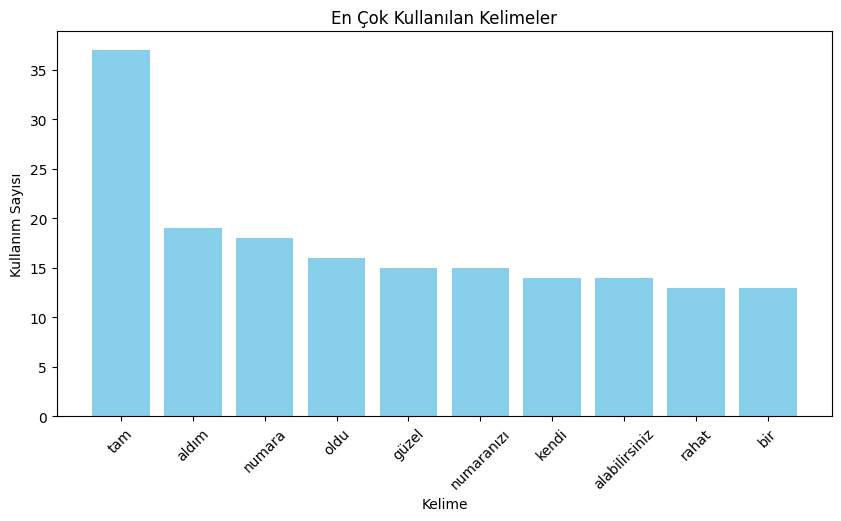

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# NLTK stopword'leri indirin
nltk.download('stopwords')

# Yorumları CSV dosyasından oku
csv_file_path = r"/content/yorumlar.csv"
yorumlar_df = pd.read_csv(csv_file_path)

# Tüm yorumları birleştir
tum_yorumlar = ' '.join(yorumlar_df['Yorum'].astype(str))

# Metni küçük harfe çevir
tum_yorumlar = tum_yorumlar.lower()

# Noktalama işaretlerini temizle
tum_yorumlar = tum_yorumlar.translate(str.maketrans('', '', string.punctuation))

# Stopword'leri (gereksiz kelimeler) temizle
stop_words = set(stopwords.words('turkish'))
kelimeler = [kelime for kelime in tum_yorumlar.split() if kelime not in stop_words]

# Kelime sıklığını hesapla
kelime_sayilari = Counter(kelimeler)

# En sık kullanılan 10 kelimeyi al
en_sik_kelimeler = kelime_sayilari.most_common(10)

# Ayrıştırma
kelimeler, sayilar = zip(*en_sik_kelimeler)

# Grafik oluşturma
plt.figure(figsize=(10, 5))
plt.bar(kelimeler, sayilar, color='skyblue')
plt.title('En Çok Kullanılan Kelimeler')
plt.xlabel('Kelime')
plt.ylabel('Kullanım Sayısı')
plt.xticks(rotation=45)
plt.show()


In [24]:
import pandas as pd
import string
from collections import Counter

# Yorumları CSV dosyasından oku
csv_file_path = r"/content/yorumlar.csv"
yorumlar_df = pd.read_csv(csv_file_path)

# Tüm yorumları birleştir
tum_yorumlar = ' '.join(yorumlar_df['Yorum'].astype(str))

# Metni küçük harfe çevir
tum_yorumlar = tum_yorumlar.lower()

# Noktalama işaretlerini temizle
tum_yorumlar = tum_yorumlar.translate(str.maketrans('', '', string.punctuation))

# Kelimeleri ayır
kelimeler = tum_yorumlar.split()

# Kelime sıklığını hesapla
kelime_sayilari = Counter(kelimeler)

# "ve" kelimesinin kullanım sayısını bulma
ve_kullanimi = kelime_sayilari.get('ve', 0)

print(f"'ve' kelimesi {ve_kullanimi} kere kullanılmış.")



've' kelimesi 19 kere kullanılmış.
